In [316]:
# import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [317]:
# read in all data and save them as pandas dataFrame objects

bom_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_name = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding= 'unicode_escape')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col='Unnamed: 0')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [320]:
tn_movie_budgets.set_index('movie', inplace=True)

In [321]:
tn_movie_budgets

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
Red 11,78,"Dec 31, 2018","$7,000",$0,$0
Following,79,"Apr 2, 1999","$6,000","$48,482","$240,495"
Return to the Land of Wonders,80,"Jul 13, 2005","$5,000","$1,338","$1,338"


In [322]:
tmdb_movies.set_index('original_title', inplace=True)

In [323]:
tmdb_movies.drop('id',axis=1, inplace=True)

In [324]:
tmdb_movies.drop('release_date',axis=1, inplace=True)

In [325]:
df1 = tn_movie_budgets.join(tmdb_movies, how='left')

In [326]:
df1

,id,release_date,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,popularity,title,vote_average,vote_count
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,"[18, 9648, 27, 53]",de,6.099,#Horror,3.3,102.0
(500) Days of Summer,55,"Jul 17, 2009","$7,500,000","$32,425,665","$34,439,060",NaN,NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422","[53, 878, 18]",en,17.892,10 Cloverfield Lane,6.9,4629.0
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",[18],en,0.955,10 Days in a Madhouse,5.4,7.0
10 Things I Hate About You,63,"Mar 31, 1999","$13,000,000","$38,177,966","$60,413,950",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
mother!,59,"Sep 15, 2017","$30,000,000","$17,800,004","$42,531,076","[18, 27, 9648]",en,15.227,mother!,7.0,3458.0
xXx,98,"Aug 9, 2002","$70,000,000","$141,930,000","$267,200,000",NaN,NaN,NaN,NaN,NaN,NaN
xXx: Return of Xander Cage,15,"Jan 20, 2017","$85,000,000","$44,898,413","$345,033,359","[28, 12, 80]",en,21.749,xXx: Return of Xander Cage,5.6,2452.0
Ã l\'intÃ©rieur,57,"Apr 15, 2008","$3,000,000",$0,"$895,932",NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
df1.drop(['domestic_gross','original_language','popularity','title','vote_average','vote_count'], axis=1, inplace=True)

In [328]:
def clean_amount(money):
    
    money = money.replace('$', '')
    
    for i in range(len(money)//4):
        money = money.replace(',', '')
    return int(money)

In [329]:
df1['production_budget'] = df1['production_budget'].map(lambda x: clean_amount(x))
df1['worldwide_gross'] = df1['worldwide_gross'].map(lambda x: clean_amount(x))

In [330]:
df1

,id,release_date,production_budget,worldwide_gross,genre_ids
#Horror,16,"Nov 20, 2015",1500000,0,"[18, 9648, 27, 53]"
(500) Days of Summer,55,"Jul 17, 2009",7500000,34439060,NaN
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,108286422,"[53, 878, 18]"
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,[18]
10 Things I Hate About You,63,"Mar 31, 1999",13000000,60413950,NaN
...,...,...,...,...,...
mother!,59,"Sep 15, 2017",30000000,42531076,"[18, 27, 9648]"
xXx,98,"Aug 9, 2002",70000000,267200000,NaN
xXx: Return of Xander Cage,15,"Jan 20, 2017",85000000,345033359,"[28, 12, 80]"
Ã l\'intÃ©rieur,57,"Apr 15, 2008",3000000,895932,NaN


In [331]:
df1['release_date'] = df1['release_date'].map(lambda x: int(x[-4:]))

In [332]:
df1.reset_index(inplace=True)

In [333]:
df1

,index,id,release_date,production_budget,worldwide_gross,genre_ids
0,#Horror,16,2015,1500000,0,"[18, 9648, 27, 53]"
1,(500) Days of Summer,55,2009,7500000,34439060,NaN
2,10 Cloverfield Lane,54,2016,5000000,108286422,"[53, 878, 18]"
3,10 Days in a Madhouse,48,2015,12000000,14616,[18]
4,10 Things I Hate About You,63,1999,13000000,60413950,NaN
...,...,...,...,...,...,...
6134,mother!,59,2017,30000000,42531076,"[18, 27, 9648]"
6135,xXx,98,2002,70000000,267200000,NaN
6136,xXx: Return of Xander Cage,15,2017,85000000,345033359,"[28, 12, 80]"
6137,Ã l\'intÃ©rieur,57,2008,3000000,895932,NaN


In [334]:
 num_to_genre =    {'28':'Action',
                    '12':'Adventure',
                    '16':'Animation',
                    '35':'Comedy',
                    '80':'Crime',
                    '99':'Documentary',
                    '18':'Drama',
                    '10751':'Family',
                    '14':'Fantasy',
                    '36':'History',
                    '27':'Horror',
                    '10402':'Music',
                    '9648':'Mystery',
                    '10749':'Romance',
                    '878':'Science Fiction',
                    '10770':'TV Movie',
                    '53':'Thriller',
                    '10752':'War',
                    '37':'Western'}

In [335]:
def str_to_list(x):
    x = x.replace('[', '')
    x = x.replace(']', '')
    r_list = x.split(',')
    r_list = [x.strip() for x in r_list]
    
    return r_list

In [336]:
df2 = df1.dropna(subset=['genre_ids'])

In [337]:
df2['genre_ids'] = df2['genre_ids'].map(lambda x: str_to_list(x))

<ipython-input-337-9dab8dd0e1c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['genre_ids'] = df2['genre_ids'].map(lambda x: str_to_list(x))


In [338]:
df2

,index,id,release_date,production_budget,worldwide_gross,genre_ids
0,#Horror,16,2015,1500000,0,"[18, 9648, 27, 53]"
2,10 Cloverfield Lane,54,2016,5000000,108286422,"[53, 878, 18]"
3,10 Days in a Madhouse,48,2015,12000000,14616,[18]
12,12 Strong,64,2018,35000000,71118378,"[10752, 18, 36, 28]"
13,12 Years a Slave,18,2013,20000000,181025343,"[18, 36]"
...,...,...,...,...,...,...
6125,Zoolander 2,64,2016,50000000,55348693,[35]
6126,Zoom,26,2006,35000000,12506188,"[16, 35, 18]"
6127,Zootopia,57,2016,150000000,1019429616,"[16, 12, 10751, 35]"
6134,mother!,59,2017,30000000,42531076,"[18, 27, 9648]"


In [339]:
ww_gross_by_year = df2.groupby('release_date')['worldwide_gross'].sum()

In [341]:
df3 = df2.explode('genre_ids', ignore_index=True)

In [343]:
df4 = df3.replace('', np.nan)

In [344]:
df4 = df4.dropna(subset=['genre_ids'])

In [346]:
df4['genre_ids'] = df4['genre_ids'].map(lambda x: num_to_genre[x])

In [347]:
df4

,index,id,release_date,production_budget,worldwide_gross,genre_ids
0,#Horror,16,2015,1500000,0,Drama
1,#Horror,16,2015,1500000,0,Mystery
2,#Horror,16,2015,1500000,0,Horror
3,#Horror,16,2015,1500000,0,Thriller
4,10 Cloverfield Lane,54,2016,5000000,108286422,Thriller
...,...,...,...,...,...,...
5527,mother!,59,2017,30000000,42531076,Horror
5528,mother!,59,2017,30000000,42531076,Mystery
5529,xXx: Return of Xander Cage,15,2017,85000000,345033359,Action
5530,xXx: Return of Xander Cage,15,2017,85000000,345033359,Adventure


In [348]:
df4.sort_values('release_date', ascending=False, inplace=True)
df4.reset_index(inplace=True)

In [349]:
df4

,level_0,index,id,release_date,production_budget,worldwide_gross,genre_ids
0,1380,El Chicano,16,2019,8000000,700261,Action
1,729,Braid,48,2019,1660000,80745,Thriller
2,4951,The Upside,85,2019,37500000,119024536,Comedy
3,1381,El Chicano,16,2019,8000000,700261,Crime
4,1379,El Chicano,16,2019,8000000,700261,Drama
...,...,...,...,...,...,...,...
5463,5403,Wilson,44,1944,5200000,2000000,Comedy
5464,5414,Wings,85,1927,2000000,0,Thriller
5465,5413,Wings,85,1927,2000000,0,Drama
5466,3994,The Birth of a Nation,78,1915,110000,11000000,Drama


In [350]:
df_thing = df4.groupby(['release_date','genre_ids'])['worldwide_gross'].count()

In [351]:
df_thing.index

MultiIndex([(1915,       'Drama'),
            (1927,       'Drama'),
            (1927,    'Thriller'),
            (1944,      'Comedy'),
            (1945,   'Animation'),
            (1945,     'Fantasy'),
            (1946,       'Drama'),
            (1946,     'History'),
            (1946,     'Romance'),
            (1948,      'Action'),
            ...
            (2018,    'Thriller'),
            (2018,         'War'),
            (2018,     'Western'),
            (2019,      'Action'),
            (2019,      'Comedy'),
            (2019,       'Crime'),
            (2019, 'Documentary'),
            (2019,       'Drama'),
            (2019,      'Horror'),
            (2019,    'Thriller')],
           names=['release_date', 'genre_ids'], length=490)

In [352]:
df_thing.values

array([  2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,
         1,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   1,   1,
         1,   1,   2,   2,   1,   4,   1,   2,   1,   1,   1,   1,   2,
         2,   1,   1,   1,   3,   1,   2,   2,   3,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   4,   2,   2,   3,   1,   2,   1,
         1,   1,   1,   3,   1,   3,   2,   2,   2,   1,   1,   2,   2,
         1,   1,   1,   1,   3,   1,   3,   1,   1,   2,   2,   2,   2,
         3,   1,   2,   2,   1,   1,   1,   1,   1,   1,   1,   2,   5,
         2,   1,   2,   1,   4,   1,   2,   4,   3,   2,   3,   2,   1,
         2,   5,   3,   1,   1,   1,   5,   4,   8,   6,   3,   1,   1,
         5,   3,   1,   1,   1,   4,   4,   2,   2,   1,   1,   

## total generated revenue for film industry per year

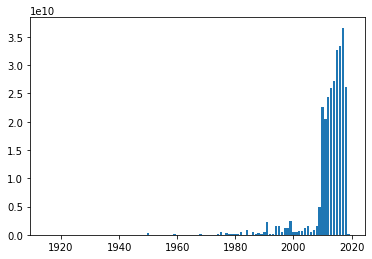

In [353]:
fig, ax = plt.subplots()

x = ww_gross_by_year.index
y = ww_gross_by_year.values

ax.bar(x,y);

this suggests that we could be looking at data that is largely from more recent times,
i.e. 2008 onward

## number of movies by genre per year

In [357]:
x = list(df_thing.index)

In [358]:
y = list(df_thing.values)

In [359]:
my_dict = {k[1]:[] for k in x}

for k,v in zip(x,y):
    tup_obj = (k[0],v)
    
    my_dict[k[1]].append(tup_obj)

In [360]:
my_dict

{'Drama': [(1915, 2),
  (1927, 1),
  (1946, 1),
  (1950, 1),
  (1953, 1),
  (1956, 1),
  (1959, 1),
  (1974, 2),
  (1976, 1),
  (1977, 1),
  (1982, 4),
  (1984, 3),
  (1985, 1),
  (1988, 3),
  (1990, 1),
  (1992, 2),
  (1994, 5),
  (1995, 3),
  (1996, 5),
  (1997, 5),
  (1998, 1),
  (1999, 5),
  (2000, 5),
  (2001, 7),
  (2002, 2),
  (2003, 5),
  (2004, 2),
  (2005, 9),
  (2006, 4),
  (2007, 2),
  (2008, 5),
  (2009, 12),
  (2010, 106),
  (2011, 109),
  (2012, 85),
  (2013, 95),
  (2014, 122),
  (2015, 153),
  (2016, 129),
  (2017, 94),
  (2018, 57),
  (2019, 4)],
 'Thriller': [(1927, 1),
  (1956, 1),
  (1972, 1),
  (1976, 1),
  (1978, 1),
  (1979, 1),
  (1980, 2),
  (1982, 1),
  (1983, 1),
  (1984, 1),
  (1985, 1),
  (1986, 2),
  (1989, 1),
  (1990, 1),
  (1991, 3),
  (1994, 1),
  (1995, 5),
  (1996, 8),
  (1997, 4),
  (1998, 1),
  (1999, 4),
  (2000, 5),
  (2001, 4),
  (2002, 4),
  (2003, 1),
  (2004, 3),
  (2005, 5),
  (2006, 2),
  (2007, 3),
  (2008, 5),
  (2009, 8),
  (2010, 55),


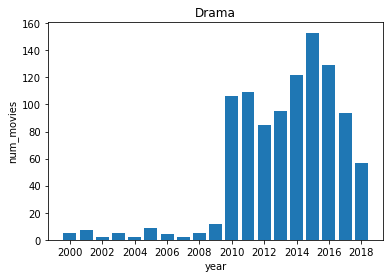

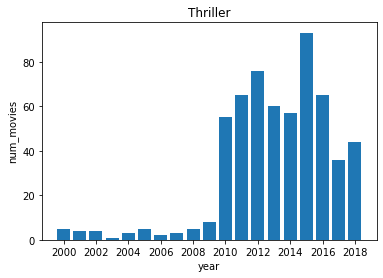

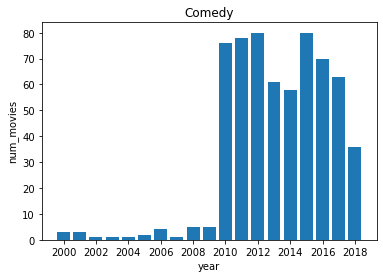

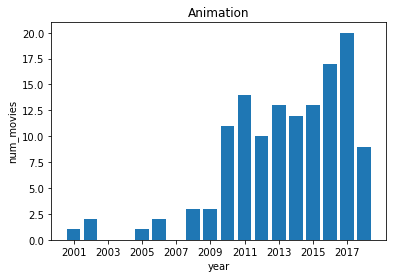

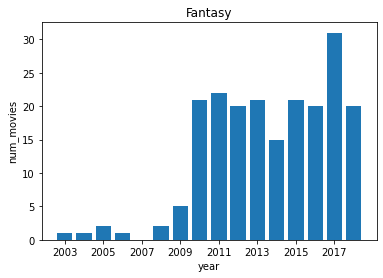

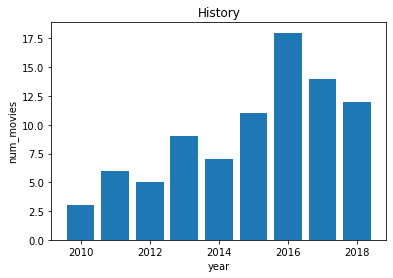

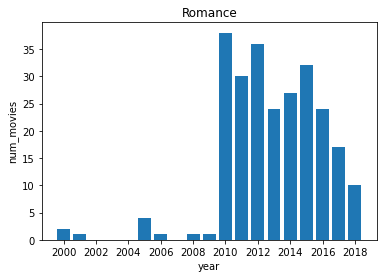

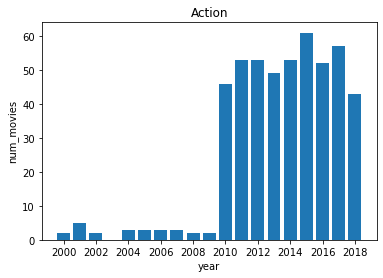

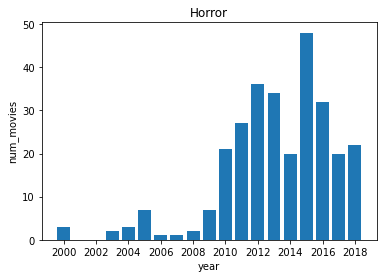

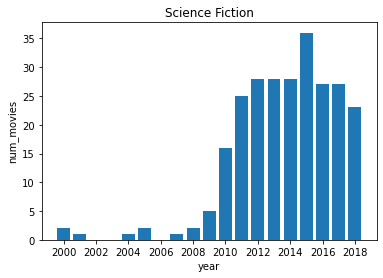

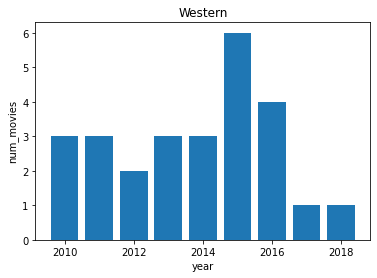

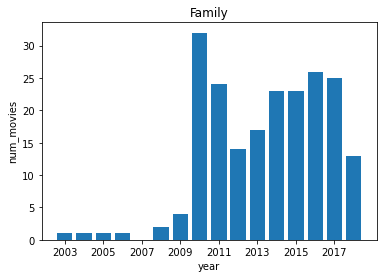

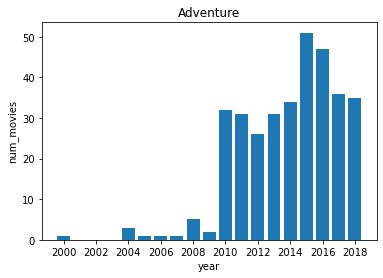

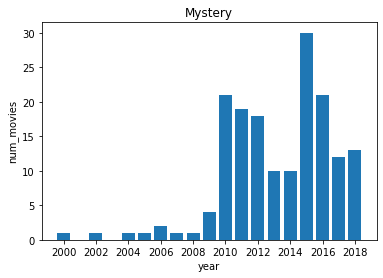

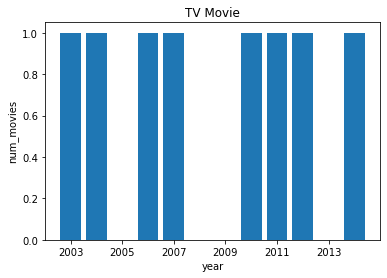

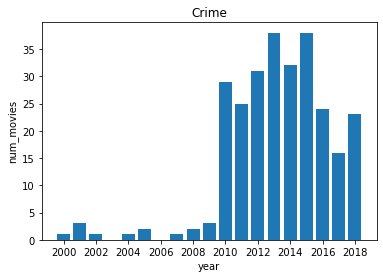

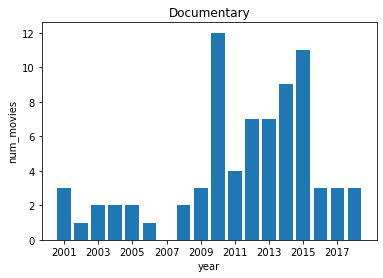

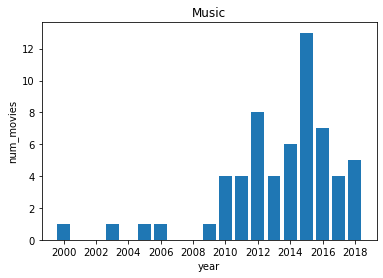

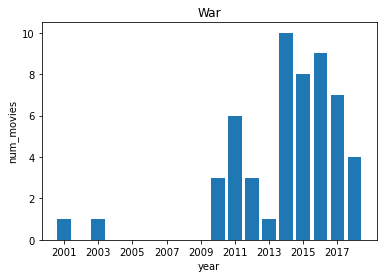

In [369]:
for k in my_dict:
    plt.figure()
    title = k
    x_lab = 'year'
    y_lab = 'num_movies'
    list_obj = my_dict[k]
    list_obj2 = [x for x in list_obj if (x[0] >= 2000) & (x[0] < 2019)]
    x = [tup[0] for tup in list_obj2]
    y = [tup[1] for tup in list_obj2]
    xint = range(min(x), max(x)+1,2)
#     yint = range(min(y), max(y)+1,5)
    plt.xticks(xint)
#     plt.yticks(yint)
    plt.bar(x,y)
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)

## revenue of movies by genre per year

In [362]:
df4

,level_0,index,id,release_date,production_budget,worldwide_gross,genre_ids
0,1380,El Chicano,16,2019,8000000,700261,Action
1,729,Braid,48,2019,1660000,80745,Thriller
2,4951,The Upside,85,2019,37500000,119024536,Comedy
3,1381,El Chicano,16,2019,8000000,700261,Crime
4,1379,El Chicano,16,2019,8000000,700261,Drama
...,...,...,...,...,...,...,...
5463,5403,Wilson,44,1944,5200000,2000000,Comedy
5464,5414,Wings,85,1927,2000000,0,Thriller
5465,5413,Wings,85,1927,2000000,0,Drama
5466,3994,The Birth of a Nation,78,1915,110000,11000000,Drama


In [363]:
df_rev_gen = df4.groupby(['release_date','genre_ids'])['worldwide_gross'].sum()

In [364]:
df_rev_gen.index

MultiIndex([(1915,       'Drama'),
            (1927,       'Drama'),
            (1927,    'Thriller'),
            (1944,      'Comedy'),
            (1945,   'Animation'),
            (1945,     'Fantasy'),
            (1946,       'Drama'),
            (1946,     'History'),
            (1946,     'Romance'),
            (1948,      'Action'),
            ...
            (2018,    'Thriller'),
            (2018,         'War'),
            (2018,     'Western'),
            (2019,      'Action'),
            (2019,      'Comedy'),
            (2019,       'Crime'),
            (2019, 'Documentary'),
            (2019,       'Drama'),
            (2019,      'Horror'),
            (2019,    'Thriller')],
           names=['release_date', 'genre_ids'], length=490)

In [365]:
x = list(df_rev_gen.index)
y = list(df_rev_gen.values)

my_dict2 = {k[1]:[] for k in x}

for k,v in zip(x,y):
    tup_obj = (k[0],v)
    
    my_dict2[k[1]].append(tup_obj)

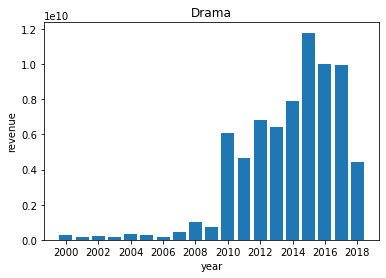

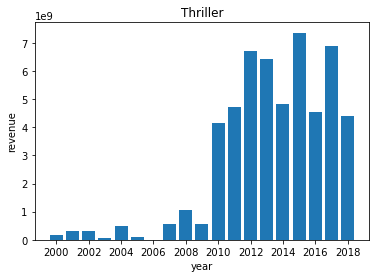

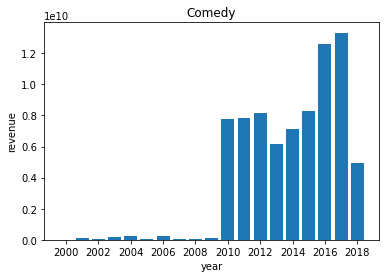

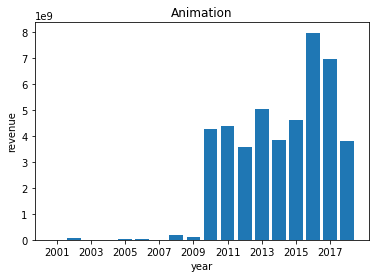

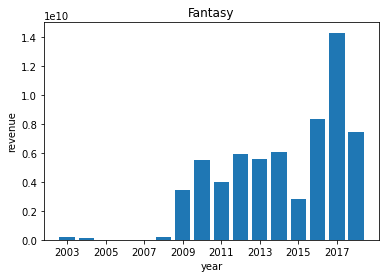

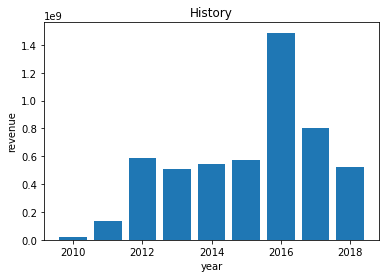

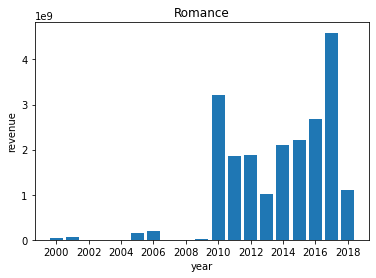

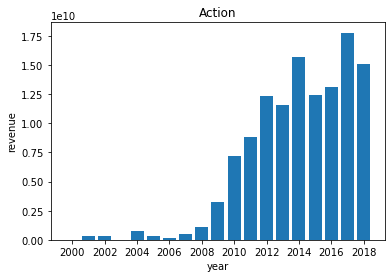

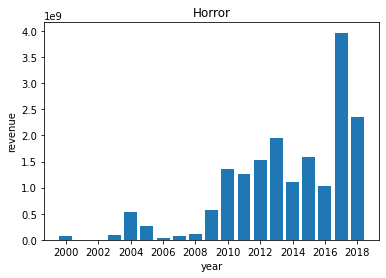

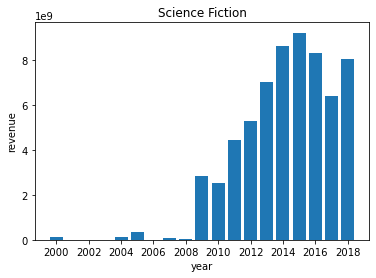

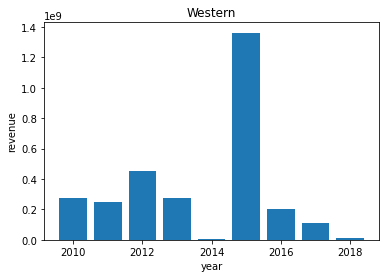

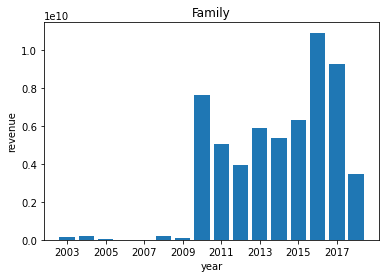

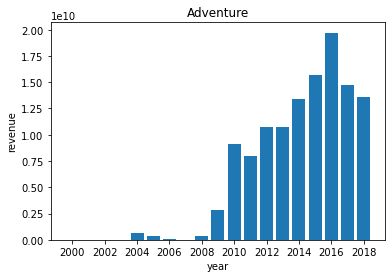

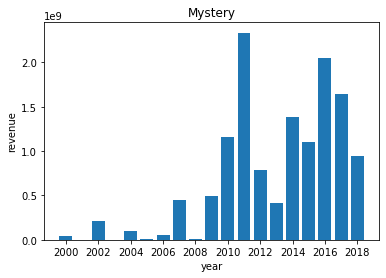

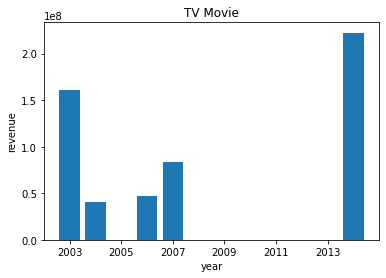

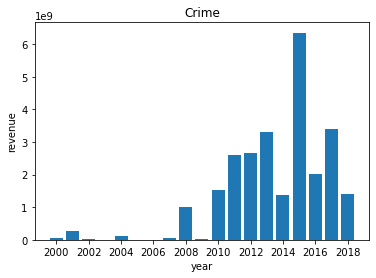

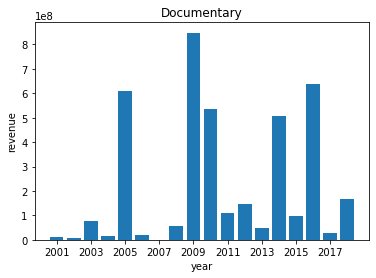

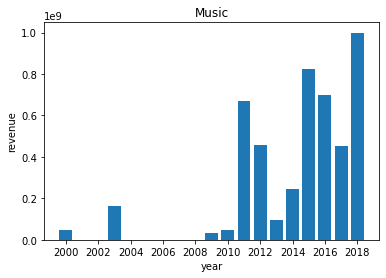

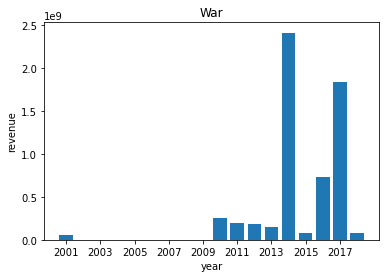

In [368]:
for k in my_dict2:
    plt.figure()
    title = k
    x_lab = 'year'
    y_lab = 'revenue'
    list_obj = my_dict2[k]
    list_obj2 = [x for x in list_obj if (x[0] >= 2000) & (x[0] < 2019)]
    x = [tup[0] for tup in list_obj2]
    y = [tup[1] for tup in list_obj2]
    xint = range(min(x), max(x)+1,2)
#     yint = range(min(y), max(y)+1,5)
    plt.xticks(xint)
#     plt.yticks(yint)
    plt.bar(x,y)
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)

## revenue as percent of total by genre per year

In [303]:
x = list(ww_gross_by_year.index)
y = list(ww_gross_by_year.values)

ww_gross_dict = {a:b for a,b in zip(x,y)}

In [312]:
df5 = pd.DataFrame.from_dict(ww_gross_dict, orient='index')

In [313]:
df5

,0
1915,22000000
1927,0
1944,2000000
1945,7000000
1946,23600000
1948,9012000
1950,263591415
1951,0
1953,2500000
1956,2000000


In [373]:
my_dict2

{'Drama': [(1915, 22000000),
  (1927, 0),
  (1946, 23600000),
  (1950, 263591415),
  (1953, 2500000),
  (1956, 0),
  (1959, 73259017),
  (1974, 58092760),
  (1976, 25878153),
  (1977, 340800479),
  (1982, 197288554),
  (1984, 176391206),
  (1985, 2730877),
  (1988, 323594548),
  (1990, 61308153),
  (1992, 93105116),
  (1994, 1268935465),
  (1995, 445206036),
  (1996, 169710559),
  (1997, 560128910),
  (1998, 376000000),
  (1999, 139848815),
  (2000, 274274458),
  (2001, 173846468),
  (2002, 244421176),
  (2003, 162186286),
  (2004, 319362860),
  (2005, 285101101),
  (2006, 154986407),
  (2007, 444043396),
  (2008, 1004426989),
  (2009, 738444999),
  (2010, 6065960848),
  (2011, 4632614672),
  (2012, 6844909909),
  (2013, 6437410155),
  (2014, 7881868490),
  (2015, 11791924443),
  (2016, 10021552812),
  (2017, 9971624584),
  (2018, 4434050195),
  (2019, 135167840)],
 'Thriller': [(1927, 0),
  (1956, 2000000),
  (1972, 12600000),
  (1976, 25878153),
  (1978, 70000000),
  (1979, 35841901)

In [374]:
my_dict_norm = {}

for k in my_dict2:
    
    my_dict_norm[k] = []
    
    for m in my_dict2[k]:
        year = m[0]
        adj_rev = m[1] / ww_gross_dict[year]
        tup = (year, adj_rev)
        my_dict_norm[k].append(tup)

<ipython-input-374-3f4092201de4>:9: RuntimeWarning: invalid value encountered in long_scalars
  adj_rev = m[1] / ww_gross_dict[year]


In [375]:
my_dict_norm

{'Drama': [(1915, 1.0),
  (1927, nan),
  (1946, 1.0),
  (1950, 1.0),
  (1953, 1.0),
  (1956, 0.0),
  (1959, 1.0),
  (1974, 0.6479783233718882),
  (1976, 0.5),
  (1977, 1.0),
  (1982, 0.4641786177871134),
  (1984, 0.21685447606252636),
  (1985, 1.0),
  (1988, 1.0),
  (1990, 0.11555728145897207),
  (1992, 0.41073467873326786),
  (1994, 0.8356480391715458),
  (1995, 0.2724915330218684),
  (1996, 0.29363544357034593),
  (1997, 0.4493095900281496),
  (1998, 0.3199140555654401),
  (1999, 0.05574686194627684),
  (2000, 0.6196627112771893),
  (2001, 0.36668979204100566),
  (2002, 0.4094141484587655),
  (2003, 0.2675783324263168),
  (2004, 0.2529325060095187),
  (2005, 0.19102634630286036),
  (2006, 0.2951596496500381),
  (2007, 0.5734714023839108),
  (2008, 0.6297877325757584),
  (2009, 0.15199296507616505),
  (2010, 0.26798897121495724),
  (2011, 0.226221274085786),
  (2012, 0.280218372582306),
  (2013, 0.24846765817706415),
  (2014, 0.28957397379718286),
  (2015, 0.3613156135469546),
  (2016

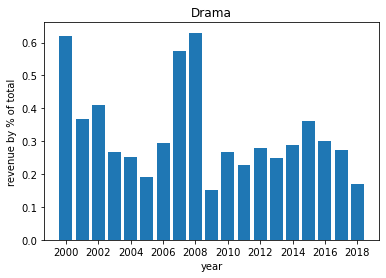

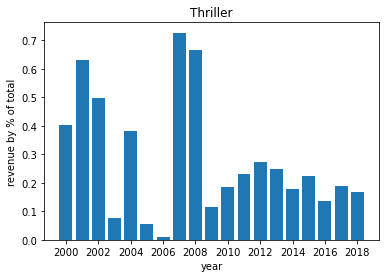

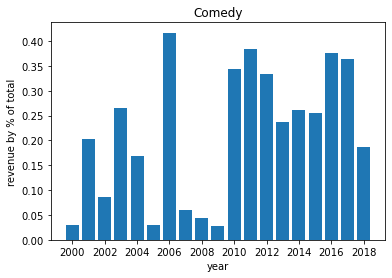

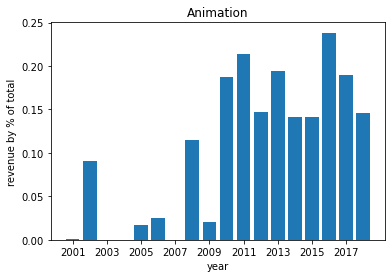

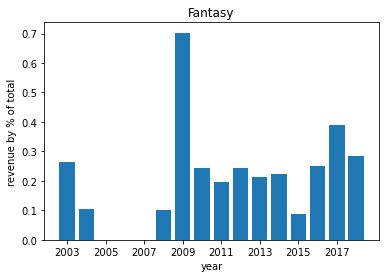

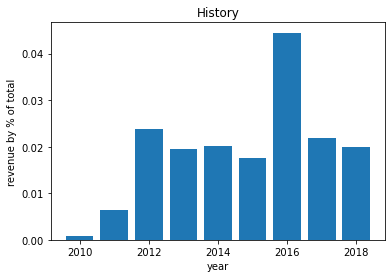

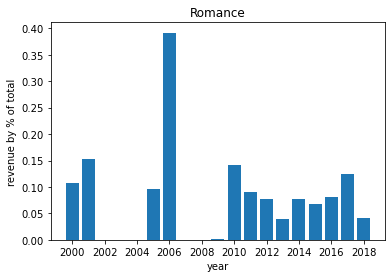

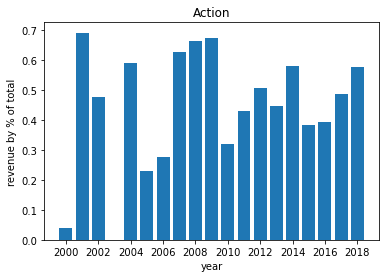

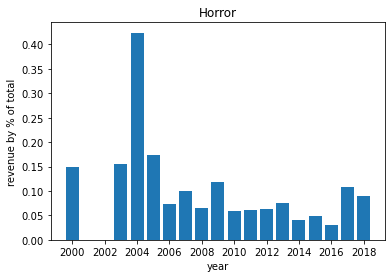

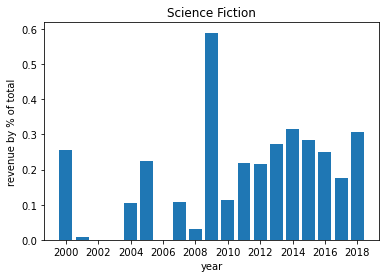

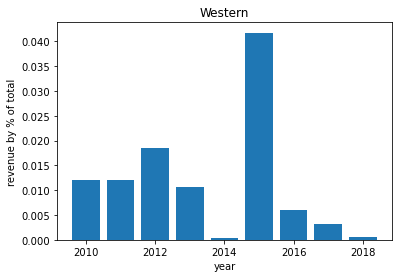

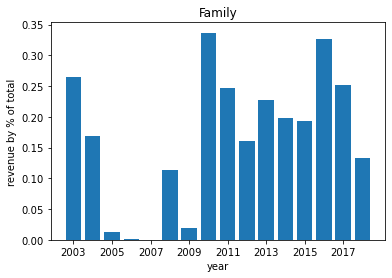

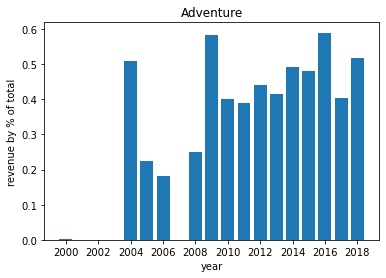

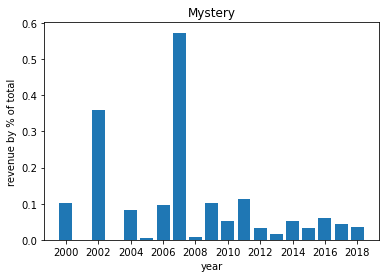

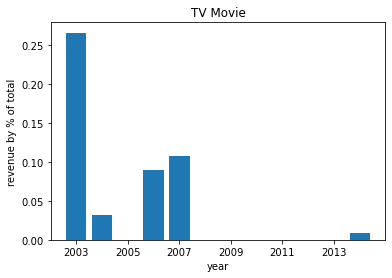

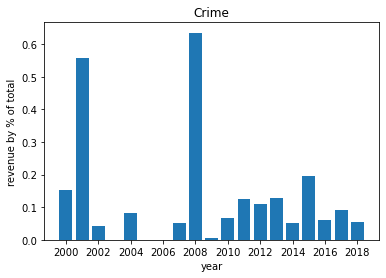

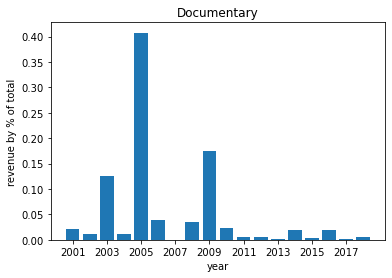

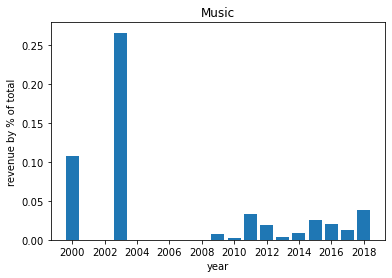

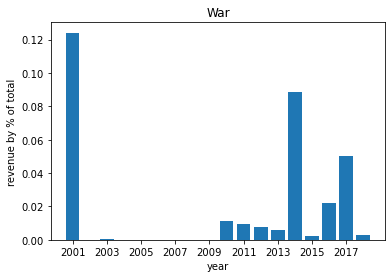

In [376]:
for k in my_dict_norm:
    plt.figure()
    title = k
    x_lab = 'year'
    y_lab = 'revenue by % of total'
    list_obj = my_dict_norm[k]
    list_obj2 = [x for x in list_obj if (x[0] >= 2000) & (x[0] < 2019)]
    x = [tup[0] for tup in list_obj2]
    y = [tup[1] for tup in list_obj2]
    xint = range(min(x), max(x)+1,2)
#     yint = range(min(y), max(y)+1,5)
    plt.xticks(xint)
#     plt.yticks(yint)
    plt.bar(x,y)
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)